In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp
import decimal
import random
#decimal.getcontext().prec = 4
import itertools
from numba import njit
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Adam/Desktop/dep1_dozera', converters={'pu_mały':eval, 'pu_duży': eval, 'pu_nie_wiadomo': eval,'2mały': eval,'2duży': eval,'2nie wiadomo': eval, '3mały': eval,'3duży': eval, '3nie wiadomo': eval})

In [3]:
data

,Unnamed: 0,delta,pop_mean,n,sd,x_w_próbie,pu_mały,pu_duży,pu_nie_wiadomo,2mały,2duży,2nie wiadomo,3mały,3duży,3nie wiadomo
0,0,4,-2.0,15,1.5,-2.090539,"[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]"
1,1,4,-2.0,16,1.5,-1.613619,"[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]"
2,2,4,-2.0,17,1.5,-1.819341,"[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]"
3,3,4,-2.0,18,1.5,-1.955216,"[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]"
4,4,4,-2.0,19,1.5,-2.512287,"[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0, 0]","[0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,39396,4,2.0,41,4.5,2.544195,"[0.01, 0.99]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0.01, 0.99]","[0.01, 0.98]","[0, 0]","[0.99, 0.99]"
39397,39397,4,2.0,42,4.5,3.744325,"[0.37, 0.63]","[0.01, 0.36]","[0.64, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0.01, 0.26]","[0, 0]","[0.27, 0.99]"
39398,39398,4,2.0,43,4.5,3.132034,"[0.11, 0.89]","[0.01, 0.1]","[0.9, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0.01, 0.79]","[0, 0]","[0.8, 0.99]"
39399,39399,4,2.0,44,4.5,2.410342,"[0.03, 0.97]","[0.01, 0.02]","[0.98, 0.99]","[0, 0]","[0, 0]","[0.01, 0.99]","[0.01, 0.94]","[0, 0]","[0.95, 0.99]"


In [4]:
#jakie analizy chcę przeprowadzić:
# porównać wszystko w zależności od śreedniej - wykresiki spoko, dane liczbowe dla poszczególnych przedziałów - wcześniej określić grupki
# co z różnicami w wielkości grupy, wariancji? - dla każdej wartości porównać? dla każdej średniej wyciągnąć rozkład - ale nie dla każdego wyniku, dla 4/5 dla każdej grupy - tam zobaczyć jak to się ma za pomocą cross validation
#zrobić wiele porównań przedziałów, ale dla różnych n, sd
# czyli główne porównanie to wykresiki, cross validation - co to znaczy, że jest ok? jak jest więcej i wskazuje więcej - te warunki wyodrębnić, gdy jest małe -analogicznie
# nie wiaodmo - wyodrębnić osobno - zobaczyć jak często poszczególne warunki na to wskazują

In [5]:
def zamień(pop_mean,delta):
    #if pop_mean>=delta:
    #    m_kolor = 'white'
    #    d_kolor = 'red'
    #else:
    #    m_kolor = 'blue'
    #    d_kolor = 'white'
    #return m_kolor, d_kolor
    return np.where(pop_mean>=delta,1,-1)

In [6]:
#zamień(data.loc(0)[0]['pu_mały'],data.loc(0)[0]['pu_duży'],data.loc(0)[0]['pu_nie_wiadomo'],data.loc(0)[0]['pop_mean'],data.loc(0)[0]['delta'])

In [7]:
def wykres_ogólny(n,sd,data):
    
    #ax3.axvline(mis[i],ymin=d3[0],ymax=d3[1], color = 'white')
    
    fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
    #mlt.rcParams['figure.figsize'] = [2,2]
    #mlt.rcParams.update(mlt.rcParamsDefault)
    #plt.figure(figsize=(8,6))
    ax1.set_title('przedziały ufności')
    ax2.set_title('podejście 2')
    ax3.set_title('podejście 3')
    sub = data[(data['n']==n) & (data['sd'] == sd)]
    ax1.set_xlim(-3,3)
    a = 0
    for i in sub['Unnamed: 0']:
        if sub['pop_mean'][i]>=sub['delta'][i]:
            m_kolor = 'red'
            d_kolor = 'green'
        else:
            m_kolor = 'blue'
            d_kolor = 'red'
        if a == 0:
            a+=1
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_duży'][i][0],ymax=sub['pu_duży'][i][1], color = 'green',label = 'efekt duży')
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_mały'][i][0],ymax=sub['pu_mały'][i][1], color = 'blue',label = 'efekt mały')
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_nie_wiadomo'][i][0],ymax=sub['pu_nie_wiadomo'][i][1], color = 'black',label = 'nie wiadomo')
        else:
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_duży'][i][0],ymax=sub['pu_duży'][i][1], color = d_kolor)
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_mały'][i][0],ymax=sub['pu_mały'][i][1], color = m_kolor)
            ax1.axvline(sub['pop_mean'][i],ymin=sub['pu_nie_wiadomo'][i][0],ymax=sub['pu_nie_wiadomo'][i][1], color = 'black')
        
        ax2.axvline(sub['pop_mean'][i],ymin=sub['2duży'][i][0],ymax=sub['2duży'][i][1], color = d_kolor)
        ax2.axvline(sub['pop_mean'][i],ymin=sub['2mały'][i][0],ymax=sub['2mały'][i][1], color = m_kolor)
        ax2.axvline(sub['pop_mean'][i],ymin=sub['2nie wiadomo'][i][0],ymax=sub['2nie wiadomo'][i][1], color = 'black')
        
        ax3.axvline(sub['pop_mean'][i],ymin=sub['3duży'][i][0],ymax=sub['3duży'][i][1], color = d_kolor)
        ax3.axvline(sub['pop_mean'][i],ymin=sub['3mały'][i][0],ymax=sub['3mały'][i][1], color = m_kolor)
        ax3.axvline(sub['pop_mean'][i],ymin=sub['3nie wiadomo'][i][0],ymax=sub['3nie wiadomo'][i][1], color = 'black')
    fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1))
    #ax1.axvline(sub['pop_mean'][],ymin=sub['pu_duży'][-1][0],ymax=sub['pu_duży'][-1][1], color = 'green',label = 'efekt duży')
    #ax1.axvline(sub['pop_mean'][-1],ymin=sub['pu_mały'][-1][0],ymax=sub['pu_mały'][-1][1], color = 'blue',label = 'efekt mały')
    #ax1.axvline(sub['pop_mean'][-1],ymin=sub['pu_nie_wiadomo'][i][0],ymax=sub['pu_nie_wiadomo'][-1][1], color = 'black',label = 'nie wiadomo')
    #ax2.axvline(sub['pop_mean'][-1],ymin=sub['2duży'][-1][0],ymax=sub['2duży'][-1][1], color = 'green',label = 'efekt duży')
    #ax2.axvline(sub['pop_mean'][-1],ymin=sub['2mały'][-1][0],ymax=sub['2mały'][-1][1], color = 'blue',label = 'efekt mały')
    #ax2.axvline(sub['pop_mean'][-1],ymin=sub['2nie wiadomo'][i][0],ymax=sub['2nie wiadomo'][-1][1], color = 'black',label = 'nie wiadomo')
    #ax3.axvline(sub['pop_mean'][-1],ymin=sub['3duży'][-1][0],ymax=sub['3duży'][-1][1], color = 'green',label = 'efekt duży')
    #ax3.axvline(sub['pop_mean'][-1],ymin=sub['3mały'][-1][0],ymax=sub['3mały'][-1][1], color = 'blue',label = 'efekt mały')
    #ax3.axvline(sub['pop_mean'][-1],ymin=sub['3nie wiadomo'][-1][0],ymax=sub['3nie wiadomo'][-1][1], color = 'black',label = 'nie wiadomo')
#plt.figure(figsize=(8,6))
    ax2.set_ylabel('poziom ufności')
    ax3.set_xlabel('poziom ufności dla poszczególnych odpowiedzi w zależności od średniej populacyjnej, delta=4, kolor czerwony oznacza błędną odpowiedź')
    mlt.rcParams.update(mlt.rcParamsDefault)

 

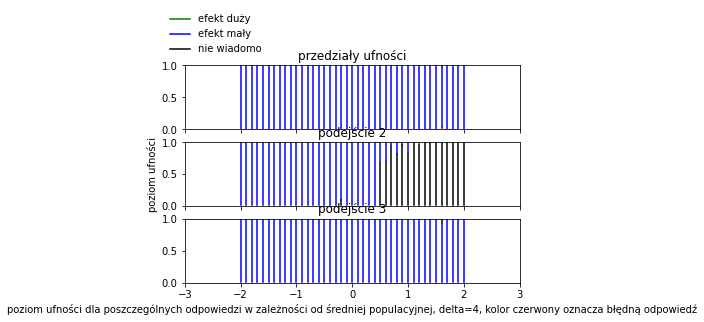

In [8]:
wykres_ogólny(30,3,data)

In [9]:
def tabele(data,n1,n2,sd1,sd2,mean1,mean2):
    sub = data.loc[(data['n']>=n1) & (data['n']<=n2) & (data['sd'] >= sd1) & (data['sd'] <= sd2) & (data['pop_mean'] >= mean1) & (data['pop_mean'] <= mean2),:]
    
    # jak często, gdy różnica była duża, podejścia na to wskazywały?
    # jak często, gdy różnica była mała, podejścia na to wskazywały?
    # jak często, gdy różnica była duża, podejścia wskazywały na wynik mały?
    # jak często, gdy różnica była mała, podejścia wskazywały na wynik duży?
    # jak często było nie wiadomo?
    # to wszystko trzeba "przepuścić" przez filtr poszczególnych wartości alfa - to znaczy - jako wynik wcześniejszych rzeczy będę miał przedziały z ufnością, dla
    # których dane podejście wskazywało na taką odpowiedź - teraz przypatrzmy sie, czy są jakieś alfy, które lepiej sobie radzą w jakimś podejściu
    
    
    sub.loc[:,'różnica'] = (sub.loc[:,'pop_mean'] - sub.loc[:,'delta'])
    
    pu = {'duże': [],
         'małe': [],
         'nie wiadomo': [],
         'duże_błędne': [],
         'małe_błędne': []
         }

    pod2 = {'duże': [],
            'małe': [],
            'nie wiadomo': [],
            'duże_błędne': [],
            'małe_błędne': []
           }

    pod3 = {'duże': [],
            'małe': [],
            'nie wiadomo': [],
            'duże_błędne': [],
            'małe_błędne': []
           }

    pu['duże'] = np.where(sub['różnica'] > 0,sub['pu_duży'],-1) #wszystkie przedziały dla podejścia, gdy wynik w rzeczywistości był ważny - -1 oznacza, że dla tego rzędu nie był
    pu['małe'] = np.where(sub['różnica'] < 0,sub['pu_mały'],-1) #analogicznie tylko z małymi
    pu['duże_błędne'] = np.where(sub['różnica'] < 0, sub['pu_duży'],-1) # wszystkie przedziały dla podejścia, gdy wynik nie był ważny w rzeczywistyości - -1 oznacza wynik ważny dla rzędu
    pu['małe_błędne'] = np.where(sub['różnica'] > 0, sub['pu_mały'],-1) # jak wyżej
    pu['nie wiadomo'] = sub['pu_nie_wiadomo']
    
    pod2['duże'] = np.where(sub['różnica'] > 0,sub['2duży'],-1)
    pod2['małe'] = np.where(sub['różnica'] < 0,sub['2mały'],-1)
    pod2['nie wiadomo'] = ['2nie wiadomo']
    pod2['duże_błędne'] = np.where(sub['różnica'] < 0, sub['2duży'],-1)
    pod2['małe_błędne'] = np.where(sub['różnica'] > 0, sub['2mały'],-1)
    
    
    pod3['duże'] = np.where(sub['różnica'] > 0,sub['3duży'],-1)
    pod3['małe'] = np.where(sub['różnica'] < 0,sub['3mały'],-1)
    pod3['duże_błędne'] = np.where(sub['różnica'] < 0, sub['3duży'],-1)
    pod3['małe_błędne'] = np.where(sub['różnica'] > 0, sub['3mały'],-1)
    pod3['nie wiadomo'] = sub['3nie wiadomo']
    
    return pu,pod2,pod3,sub

In [10]:
#-------------------------------------------------------- efekty duże poprawne--------------------------------------------

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0.5, 0, 'przedziały ')

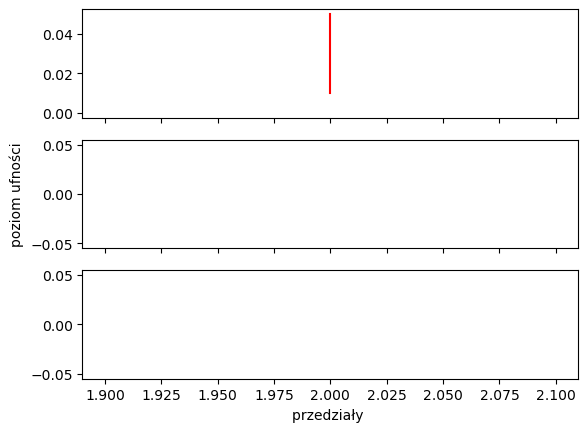

In [11]:
pu, pod2,pod3,sub = tabele(data,30,45,3,3,2,6)
por = sub['pop_mean']
pu_wielkości_duże = [i for i in zip(sub['pu_duży'],sub['różnica'],por)]
fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)
for i in pu_wielkości_duże:
    if i[1] < 0:
        ax1.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'red')
    else:
        ax1.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'green')
        
pod2_wielkości_duże = [i for i in zip(sub['2duży'],sub['różnica'],por)]
for i in pod2_wielkości_duże:
    if i[1] < 0:
        ax2.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'red')
    else:
        ax2.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'green')

pod3_wielkości_duże = [i for i in zip(sub['3duży'],sub['różnica'],por)]
for i in pod3_wielkości_duże:
    if i[1] < 0:
        ax3.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'red')
    else:
        ax3.plot([i[2],i[2]],[i[0][0],i[0][1]],color = 'green')
ax2.set_ylabel('poziom ufności')
ax3.set_xlabel('przedziały ')

In [12]:
#----------------------------------------------- poprawność odpowiedzi ----------------------------------------------------------------------

In [13]:
pu, pod2,pod3,sub = tabele(data,40,45,4.5,4.5,-2,2)
# test wskazał na efekt duży i taki był w rzeczywistości

#przedziały ufności
pu_duże = [i for i in pu['duże'] if i != -1]
pu_duże_test = [i for i in pu_duże if (i[0] != i[1] and float(i[0] != 0.00))]
pu_procent_dużych_poprawnych = len(pu_duże_test)/len(pu_duże) if len(pu_duże) != 0 else 'brak efektów'

#podejście 2
pod2_duże = [i for i in pod2['duże'] if i != -1]
pod2_duże_test = [i for i in pod2_duże if (i[0] != i[1] and float(i[0] != 0.00))]
pod2_procent_dużych_poprawnych = len(pod2_duże_test)/len(pod2_duże) if len(pod2_duże) != 0 else 'brak efektów'

#podejście 3
pod3_duże = [i for i in pod3['duże'] if i != -1]
pod3_duże_test = [i for i in pod3_duże if (i[0] != i[1] and float(i[0] != 0.00))]
pod3_procent_dużych_poprawnych = len(pod3_duże_test)/len(pod3_duże) if len(pod3_duże) != 0 else 'brak efektów'

print('procent poprawnie wskazanych efektów dużych')
print('przedziały ufności: ',pu_procent_dużych_poprawnych)
print('podejście 2: ',pod2_procent_dużych_poprawnych)
print('podejście 3: ',pod3_procent_dużych_poprawnych)

#test wskazał na efekt mały i taki był w rzeczywistości
#przedziały ufności
pu_małe = [i for i in pu['małe'] if i != -1]
pu_małe_test = [i for i in pu_małe if (i[0] != i[1] and float(i[0] != 0.00))]
pu_procent_małych_poprawnych = len(pu_małe_test)/len(pu_małe) if len(pu_małe) != 0 else 'brak efektów'

#podejście 2
pod2_małe = [i for i in pod2['małe'] if i != -1]
pod2_małe_test = [i for i in pod2_małe if (i[0] != i[1] and float(i[0] != 0.00))]
pod2_procent_małych_poprawnych = len(pod2_małe_test)/len(pod2_małe) if len(pod2_małe) != 0 else 'brak efektów'

#podejście 3
pod3_małe = [i for i in pod3['małe'] if i != -1]
pod3_małe_test = [i for i in pod3_małe if (i[0] != i[1] and float(i[0] != 0.00))]
pod3_procent_małych_poprawnych = len(pod3_małe_test)/len(pod3_małe) if len(pod3_małe) != 0 else 'brak efektów'

print('\n')
print('procent poprawnie wskazanych efektów małych')
print('przedziały ufności: ',pu_procent_małych_poprawnych)
print('podejście 2: ',pod2_procent_małych_poprawnych)
print('podejście 3: ',pod3_procent_małych_poprawnych)

# test wskazał na efekt duży, w rzeczywistości był mały
#przedziały ufności
pu_duże_źle = [i for i in pu['duże_błędne'] if i != -1]
pu_duże_test_źle = [i for i in pu_duże_źle if (i[0] != i[1] and float(i[0] != 0.00))]
pu_procent_dużych_źle = len(pu_duże_test_źle)/len(pu_duże_źle) if len(pu_duże_źle) != 0 else 'brak efektów'

#podejście 2
pod2_duże_źle = [i for i in pod2['duże_błędne'] if i != -1]
pod2_duże_test_źle = [i for i in pod2_duże_źle if (i[0] != i[1] and float(i[0] != 0.00))]
pod2_procent_dużych_źle = len(pod2_duże_test_źle)/len(pod2_duże_źle) if len(pod2_duże_źle) != 0 else 'brak efektów'

#podejście 3
pod3_duże_źle = [i for i in pod3['duże_błędne'] if i != -1]
pod3_duże_test_źle = [i for i in pod3_duże_źle if (i[0] != i[1] and float(i[0] != 0.00))]
pod3_procent_dużych_źle = len(pod3_duże_test_źle)/len(pod3_duże_źle) if len(pod3_duże_źle) != 0 else 'brak efektów'

print('\n')
print('procent błędnie wskazanych efektów dużych')
print('przedziały ufności: ',pu_procent_dużych_źle)
print('podejście 2: ',pod2_procent_dużych_źle)
print('podejście 3: ',pod3_procent_dużych_źle)

# test wskazał na efekt mały, w rzeczywistości był duży
#przedziały ufności
pu_małe_zle = [i for i in pu['małe_błędne'] if i != -1]
pu_małe_test_zle = [i for i in pu_małe_zle if (i[0] != i[1] and float(i[0] != 0.00))]
pu_procent_małych_zle = len(pu_małe_test_zle)/len(pu_małe_zle) if len(pu_małe_zle) != 0 else 'brak efektów'

#podejście 2
pod2_małe_zle = [i for i in pod2['małe_błędne'] if i != -1]
pod2_małe_test_zle = [i for i in pod2_małe_zle if (i[0] != i[1] and float(i[0] != 0.00))]
pod2_procent_małych_zle = len(pod2_małe_test_zle)/len(pod2_małe_zle) if len(pod2_małe_zle) != 0 else 'brak efektów'

#podejście 3
pod3_małe_zle = [i for i in pod3['małe_błędne'] if i != -1]
pod3_małe_test_zle = [i for i in pod3_małe_zle if (i[0] != i[1] and float(i[0] != 0.00))]
pod3_procent_małych_zle = len(pod3_małe_test_zle)/len(pod3_małe_zle) if len(pod3_małe_zle) != 0 else 'brak efektów'

print('\n')
print('procent błędnie wskazanych efektów małych')
print('przedziały ufności: ',pu_procent_małych_zle)
print('podejście 2: ',pod2_procent_małych_zle)
print('podejście 3: ',pod3_procent_małych_zle)

procent poprawnie wskazanych efektów dużych
przedziały ufności:  brak efektów
podejście 2:  brak efektów
podejście 3:  brak efektów


procent poprawnie wskazanych efektów małych
przedziały ufności:  1.0
podejście 2:  0.8536585365853658
podejście 3:  1.0


procent błędnie wskazanych efektów dużych
przedziały ufności:  0.04065040650406504
podejście 2:  0.0
podejście 3:  0.0


procent błędnie wskazanych efektów małych
przedziały ufności:  brak efektów
podejście 2:  brak efektów
podejście 3:  brak efektów


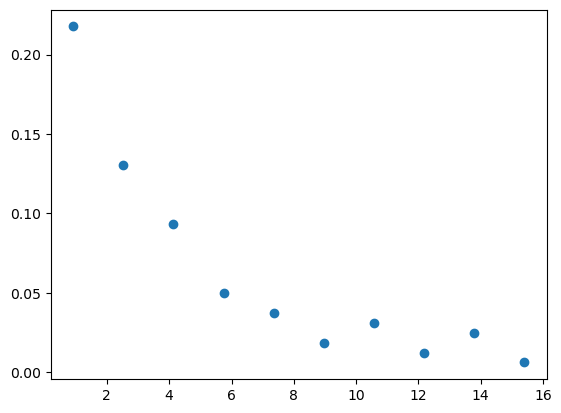

In [37]:
lst = np.random.exponential(4,size=100)
hist,edges = np.histogram(lst,bins="auto",density=True)
x = edges[:-1]+np.diff(edges)/2.
plt.scatter(x,hist)
